# Story

You and your team believe that if you were given more money to spend on advertising, 
you could boost sales.

Therefore, you want to convince decision makers to grant you a budget increase.


How are you going to do that?

# Data

Gladly, you have already collected marketing and sales data

Input (=marketing budgets):
- TV
- Radio
- Newspaper

Output (=sales):
- Sales

# Objective

To prove your point and to be able to propose specific measures you want to:
- Understand the relationship between advertising spending and sales
- Be able to predict sales given a certain budget
- Use this understanding to devise an optimal budget plan


In [1]:
# code starts here
# some of the tools we use
from itertools import product

from ipywidgets import interact
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

DEFAULT_COLOR = 'bla'
COLORS = {'TV': '#1b9e77',
          'radio': '#d95f02',
          'newspaper': '#7570b3'}

In [2]:
# util.py
from itertools import product

from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


def plot_coefficients(coef, names):
    importance = pd.Series(coef, index=names, name='coef')
    fig, ax = plt.subplots()
    importance.plot.bar(ax=ax)
    ax.set_title('Coefficients')

    
def create_model_explorer(df, model):

    def explore_budget_plan(tv_budget=140, radio_budget=20, newspaper_budget=30):
        planned_budged = np.array([[tv_budget, radio_budget, newspaper_budget]])

        sales_pred = model.predict(planned_budged)

        fig, axs = plt.subplots(figsize=(14, 6), ncols=3, sharey=True)
        for xname, ax in zip(xnames, axs):
            df.plot.scatter(ax=ax, x=xname, y=yname, color=COLORS[xname])

        for budget, ax in zip(planned_budged[0], axs):
            ax.scatter(budget, sales_pred, color='k', s=800, marker='+')
            # TODO add vlines and hlines
    
    return explore_budget_plan  
 

def generate_valid_budget_allocations(total_budget):
    
    budget_options = range(0, total_budget + 1, 2)
    
    budget_allocations = []
    for budget_allocation in product(budget_options, budget_options, budget_options):
        if sum(budget_allocation) != total_budget:
            continue
        budget_allocations.append(budget_allocation)
    return np.array(budget_allocations)

# Data Exploration

About the data:
- Advertising and sales data from 200 different markets.
- Sales are in units of 1000.
- Budgets are in units of 1000$.

In [3]:
# read in the data
df = pd.read_csv('http://faculty.marshall.usc.edu/gareth-james/ISL/Advertising.csv', index_col=0)
df

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [4]:
# get a quick overview
df.describe().round()

,TV,radio,newspaper,sales
count,200.0,200.0,200.0,200.0
mean,147.0,23.0,31.0,14.0
std,86.0,15.0,22.0,5.0
min,1.0,0.0,0.0,2.0
25%,74.0,10.0,13.0,10.0
50%,150.0,23.0,26.0,13.0
75%,219.0,37.0,45.0,17.0
max,296.0,50.0,114.0,27.0


In [5]:
# budget where sales are at the minimum
df[df['sales'] == df['sales'].min()]

,TV,radio,newspaper,sales
131,0.7,39.6,8.7,1.6


In [6]:
# budget where sales are at the maximum
df[df['sales'] == df['sales'].max()]

,TV,radio,newspaper,sales
176,276.9,48.9,41.8,27.0


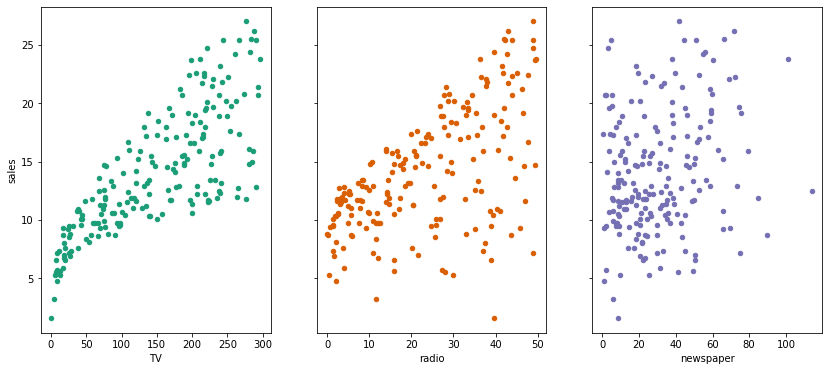

In [7]:
# more often than not, a plot gives much more insight
xnames = ['TV', 'radio', 'newspaper']
yname = 'sales'

fig, axs = plt.subplots(figsize=(14, 6), ncols=3, sharey=True)
for xname, ax in zip(xnames, axs):
    df.plot.scatter(ax=ax, x=xname, y=yname, color=COLORS[xname])

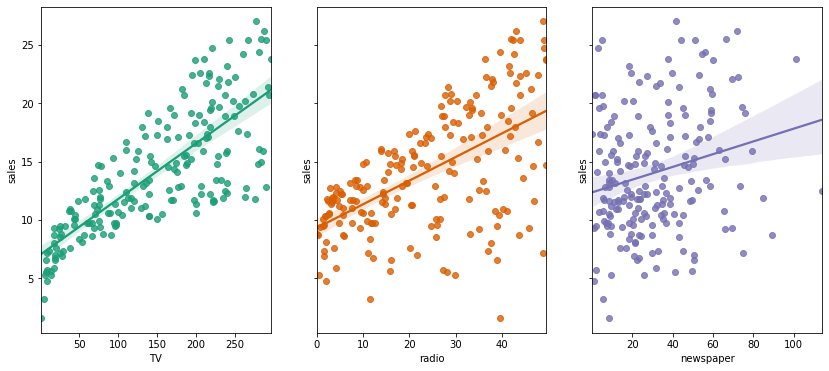

In [8]:
# seems like we have some pretty strong correlations
fig, axs = plt.subplots(figsize=(14, 6), ncols=3, sharey=True)
for xname, ax in zip(xnames, axs):
    sns.regplot(xname, yname, data=df, ax=ax, color=COLORS[xname])

# How would you allocate resources?

# https://short.wu.ac.at/newbudget

<img src="../images/1_introduction/new_budget.png" alt="New Budget Poll" width="300">

# Learning from Data

Let's follow this process:
1. Split data into train and test
1. Chose a model and:
  - fit
  - predict
  - evaluate (score, assess, ...)
1. Discuss
1. Iterate...

## Split

In [9]:
from sklearn.model_selection import train_test_split

X = df[xnames]
y = df[yname]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Model

### Choose

In [10]:
from sklearn.linear_model import LinearRegression  # our first machine learning model

### Fit

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)  # that's already it

LinearRegression()

### Predict

In [12]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
y_test_pred[:3]

array([16.5653963 , 21.18822792, 21.55107058])

### Evaluate

#### Score

In [13]:
from sklearn.metrics import r2_score
# https://en.wikipedia.org/wiki/Coefficient_of_determination
# the closer to 1 the better

r2_score(y_test, y_test_pred)

0.8609466508230367

In [14]:
# or even easier
model.score(X_test, y_test), model.score(X_train, y_train)

(0.8609466508230367, 0.9055159502227753)

#### R2 (Coefficient of Determination)

In the case of linear regression, R2 describes how well the variance in the data can be
described using a linear model.
The closer to 1, the better.

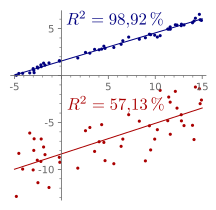

In [15]:
%%svg
https://upload.wikimedia.org/wikipedia/commons/4/4a/R2values.svg

#### Visualize (Actual vs Prediction)

Text(0, 0.5, 'y_test_pred')

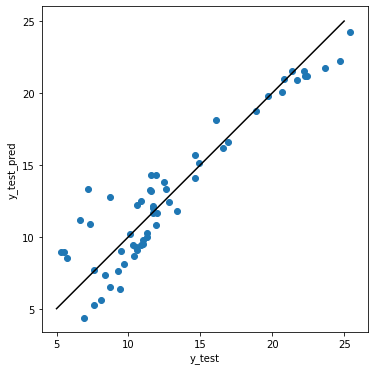

In [16]:
# or plot actual vs. prediction
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(y_test, y_test_pred)
ax.plot([5, 25], [5, 25], color='black')
ax.axis('square')
ax.set_xlabel('y_test')
ax.set_ylabel('y_test_pred')

#### Visualize (Residuals = Actual - Pred)

In [17]:
df_test = X_test.assign(sales=y_test, sales_pred=y_test_pred)
df_test['actual-pred'] = df_test['sales'] - df_test['sales_pred']

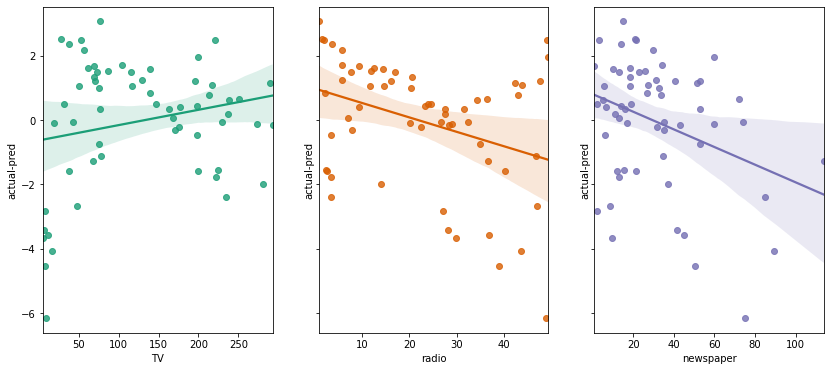

In [18]:
fig, axs = plt.subplots(figsize=(14, 6), ncols=3, sharey=True)

for xname, ax in zip(xnames, axs):
    sns.regplot(xname, 'actual-pred', data=df_test, color=COLORS[xname], ax=ax)

## Discuss

### Q&A: Investment in which channel is most valuable?

We can take a look at the model coefficients. The larger the absolute value of the coefficient, the more important the contributing factor.

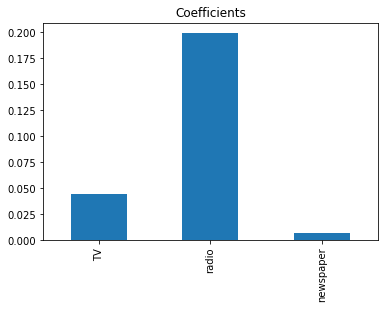

In [19]:
plot_coefficients(model.coef_, xnames)

In [20]:
explorer = interact(create_model_explorer(df_test, model), 
                    tv_budget=(0, 300), 
                    radio_budget=(0, 50),
                    newspaper_budget=(0, 100))
explorer

interactive(children=(IntSlider(value=140, description='tv_budget', max=300), IntSlider(value=20, description=…

<function __main__.create_model_explorer.<locals>.explore_budget_plan(tv_budget=140, radio_budget=20, newspaper_budget=30)>

### Q&A: How to optimally distribute additional resources?

Procedure:
1. Compute a range of different budget plans.
1. Make a prediction of each budget plan.
1. Assess the result.
1. Pick the plan with the largest increase in sales.

In [21]:
total_extra_budget = 20
extra_budget_allocations = generate_valid_budget_allocations(total_extra_budget)
extra_budget_allocations[:3]

array([[ 0,  0, 20],
       [ 0,  2, 18],
       [ 0,  4, 16]])

#### Status Quo

In [22]:
status_quo = df[xnames + [yname]].mean().to_frame().T
status_quo  # this is where we are on average (budget-wise)

,TV,radio,newspaper,sales
0,147.0425,23.264,30.554,14.0225


#### Possible Budget Plans

In [23]:
current_budget = status_quo[xnames].values
possible_budget_plans = current_budget + extra_budget_allocations
sales_pred = model.predict(possible_budget_plans)

In [24]:
plan = pd.DataFrame(possible_budget_plans, columns=xnames)
plan['sales'] = sales_pred
plan.head(3)

,TV,radio,newspaper,sales
0,147.0425,23.264,50.554,14.171696
1,147.0425,25.264,48.554,14.556506
2,147.0425,27.264,46.554,14.941316


#### Assessment

Compute impact of different budget plans on sales.

In [25]:
absolute_difference = plan - status_quo.values
absolute_difference.sort_values('sales', ascending=False).head(5)

,TV,radio,newspaper,sales
10,0.0,20.0,0.0,3.997297
20,2.0,18.0,0.0,3.686840
9,0.0,18.0,2.0,3.612487
29,4.0,16.0,0.0,3.376384
19,2.0,16.0,2.0,3.302030


In [26]:
relative_difference = (plan - status_quo.values)/status_quo.values
relative_difference.sort_values('sales', ascending=False).head(5).style.format("{:.2%}")

,TV,radio,newspaper,sales
10,0.00%,85.97%,0.00%,28.51%
20,1.36%,77.37%,0.00%,26.29%
9,0.00%,77.37%,6.55%,25.76%
29,2.72%,68.78%,0.00%,24.08%
19,1.36%,68.78%,6.55%,23.55%


#### Decision

Spend the entire additional budget on radio.

# Stepping Back

We learned something.

That's great!

Did we learn the *right* thing?